# Carregando dados necessários

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Lendo o dataframe

In [47]:
data = pd.read_csv('air_quality_health_impact_data.csv',index_col=0)
df = pd.DataFrame(data)

## Ver informações sobre o df

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5811 entries, 1 to 5811
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQI                  5811 non-null   float64
 1   PM10                 5811 non-null   float64
 2   PM2_5                5811 non-null   float64
 3   NO2                  5811 non-null   float64
 4   SO2                  5811 non-null   float64
 5   O3                   5811 non-null   float64
 6   Temperature          5811 non-null   float64
 7   Humidity             5811 non-null   float64
 8   WindSpeed            5811 non-null   float64
 9   RespiratoryCases     5811 non-null   int64  
 10  CardiovascularCases  5811 non-null   int64  
 11  HospitalAdmissions   5811 non-null   int64  
 12  HealthImpactScore    5811 non-null   float64
 13  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 681.0 KB


O método `df.info()` fornece um resumo conciso do DataFrame.
O dataframe possui 5811 entradas e 14 colunas, todas com valores não nulos. As colunas incluem 11 do tipo float64 e 3 do tipo int64, utilizando um total de 681.0 KB de memória.
Podemos 'dividir' as colunas do df em medidas de ar e características de saúde, respectivamente: "AQI, PM10, PM2_5, NO2, SO2, O3, Temperature, Humidity, WindSpeed" e "RespiratoryCases, CardiovascularCases, HospitalAdmissions, HealthImpactScore, HealthImpactClass"

In [49]:
df.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


O método `df.describe()` fornece um resumo estatístico das colunas numéricas do DataFrame. Abaixo estão as informações obtidas para cada coluna:

- AQI, PM10, NO2, O3: O desvio padrão é relativamente alto, indicando uma grande variabilidade nos dados.
- WindSpeed: O desvio padrão é relativamente baixo, indicando menor variabilidade.

- RespiratoryCases, CardiovascularCases, HospitalAdmissions, HealthImpactScore, HealthImpactClass: O desvio padrão é relativamente baixo, indicando menor variabilidade.
- HealthImpactScore: O segundo quartil e o terceiro quartil tem valores iguais, indicando que a coluna tem muitos valores repetidos.

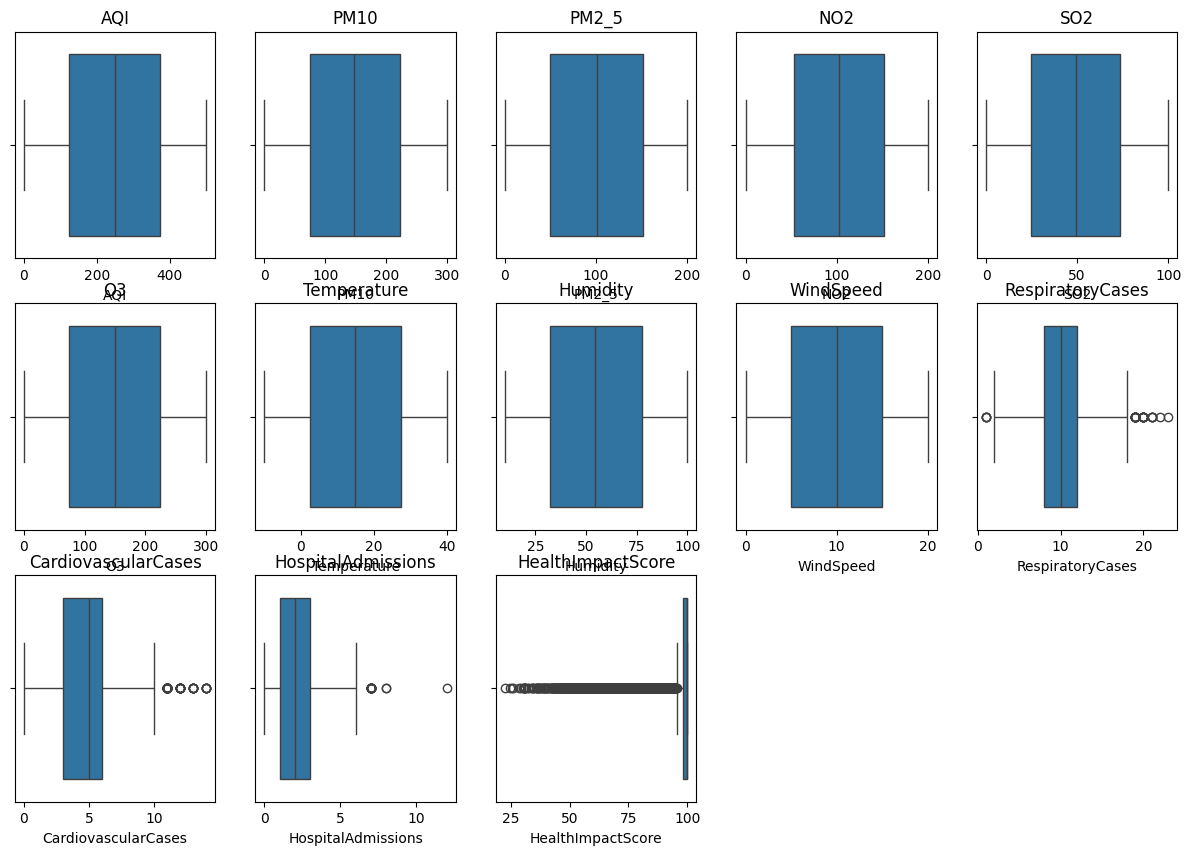

In [50]:
#criar boxplots para cada coluna para entender a distribuição dos dados
plt.figure(figsize = (15,10))
for i in enumerate(df.columns[0:13]):
        plt.subplot(3,5,i[0]+1)
        sns.boxplot(df[i[1]],orient = 'h')
        plt.title(f'{df.columns[i[0]]}')

A maioria das variáveis tem uma distribuição ampla, indicando variabilidade significativa nos dados.
As medianas de muitas variáveis estão em torno do ponto médio de suas respectivas escalas.
As variáveis relacionadas a casos de saúde (CardiovascularCases, HospitalAdmissions, HealthImpactScore) apresentam outliers significativos, sugerindo que há casos extremos que podem estar influenciando a análise.
A dispersão dos dados é bem distribuída na maioria dos casos, sugerindo que as variáveis têm uma distribuição relativamente normal, exceto pelos outliers (muitos em HealthImpactScore).

In [51]:
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,,,,,,,,,,,,,,
1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


## Entender possíveis correlações entre colunas

In [52]:
corr = df.drop(["HealthImpactClass"], axis='columns').corr()

# Remove as correlações de uma coluna com ela mesma, definindo-as como NaN
for i in range(len(corr.columns)):
    corr.iloc[i, i] = float('nan')

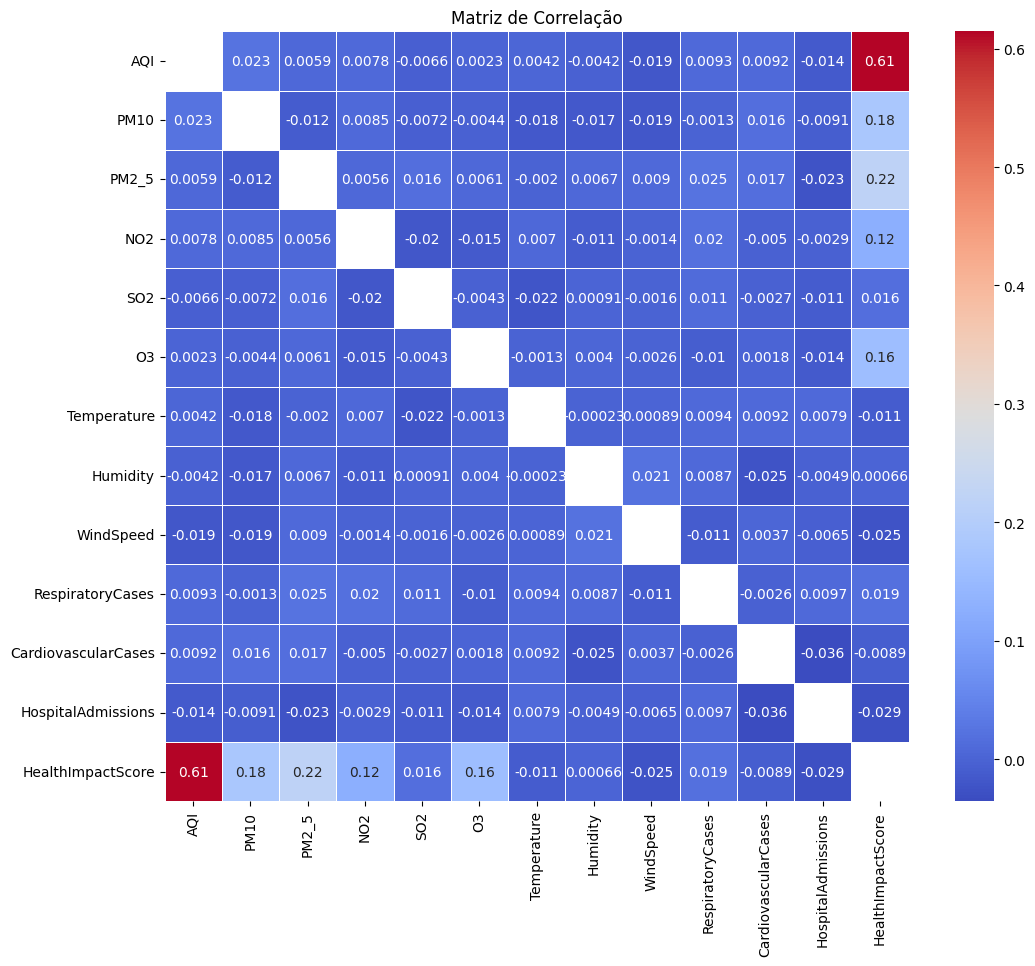

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

Como o heatmap está visivelmente azul (indicando baixa correlação entre as colunas), iremos calcular alguams métricas para entender melhor o df.

In [54]:
# Calculando os valores absolutos das correlações desconsiderando valores NaN
correlations = corr.values.flatten()
abs_correlations = np.abs(correlations[~np.isnan(correlations)])

mean_abs_corr = np.mean(abs_correlations)
median_abs_corr = np.median(abs_correlations)
max_abs_corr = np.max(abs_correlations)
min_abs_corr = np.min(abs_correlations)

In [55]:
print(f"Média das correlações: {mean_abs_corr}")
print(f"Mediana das correlações: {median_abs_corr}")
print(f"\nMaior correlação: {max_abs_corr}")
print(f"Menor correlação: {min_abs_corr}")

Média das correlações: 0.026446764420489693
Mediana das correlações: 0.009203472145175919

Maior correlação: 0.6145597341195581
Menor correlação: 0.00023278032247807463


- Média das correlações: A média das correlações absolutas é relativamente baixa, indicando que, em geral, as variáveis do DataFrame não têm fortes relações lineares entre si.
- Mediana das correlações: A mediana das correlações absolutas é ainda menor que a média, sugerindo que a maioria das correlações entre as variáveis é muito fraca ou inexistente.
- Maior correlação A maior correlação encontrada é 0.6146, que é uma correlação moderada a forte. Isso indica que há pelo menos um par de variáveis no DataFrame que têm uma relação linear significativa. No contexto dos dados, isso pode sugerir que essas variáveis estão fortemente relacionadas e podem influenciar uma à outra.
- Menor correlação: A menor correlação encontrada é 0.0002, que é praticamente zero. Isso indica que há pares de variáveis no DataFrame que não têm nenhuma relação linear entre si.

In [56]:
limite = 0.2        # Limite para considerar uma correlação
pares_correlacionados = []

correlacao_forte = 0
total = 0

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        total += 1
        if corr.iloc[i, j] > limite or corr.iloc[i, j] < -limite:
            correlacao_forte += 1
            pares_correlacionados.append((corr.columns[i], corr.columns[j]))

# Exibe a quantidade de correlações fortes
print(f"Total de correlações: {total}\nQuantidade de correlações acima de {limite} ou abaixo de {-limite}: {correlacao_forte}\nColunas com corelações fortes: {pares_correlacionados}")

Total de correlações: 169
Quantidade de correlações acima de 0.2 ou abaixo de -0.2: 4
Colunas com corelações fortes: [('AQI', 'HealthImpactScore'), ('PM2_5', 'HealthImpactScore'), ('HealthImpactScore', 'AQI'), ('HealthImpactScore', 'PM2_5')]


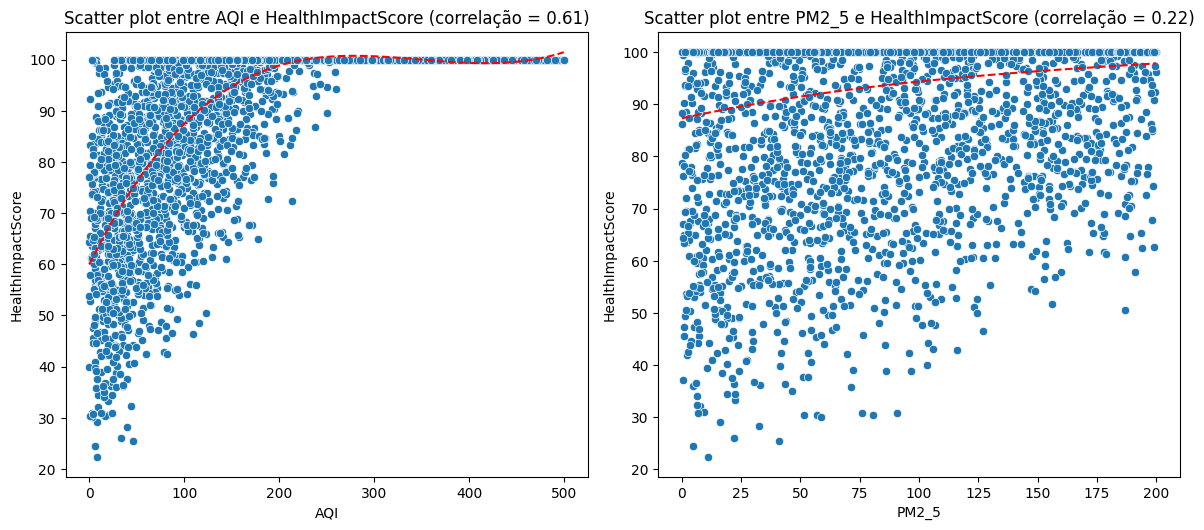

In [57]:
# Plota gráficos scatter para os pares de colunas com correlação forte ('AQI', 'HealthImpactScore') e ('PM2_5', 'HealthImpactScore')
fig = plt.figure(figsize=(12, 10))
c = 1
pares_correlacionados=pares_correlacionados[:2]
for col1, col2 in pares_correlacionados:
    axis = fig.add_subplot(2, 2, c)
    sns.scatterplot(x=df[col1], y=df[col2])
    axis.set_title(f'Scatter plot entre {col1} e {col2} (correlação = {corr.loc[col1, col2]:.2f})')
    axis.set_xlabel(col1)
    axis.set_ylabel(col2)
    c += 1

    # criar funcao polinomial de grau 2 para mostrar a relacao
    z = np.polyfit(df[col1], df[col2], 3)  # ajuste polinomial de grau 2
    p = np.poly1d(z)  # função polinomial
    x_range = np.linspace(df[col1].min(), df[col1].max(), 100)  # cria uma gama de valores para x
    plt.plot(x_range, p(x_range), "r--")  # plota a curva polinomial

plt.tight_layout()
plt.show()


Os gráficos mostram relações entre o HealthImpactScore e dois diferentes índices de qualidade do ar (PM2_5 e AQI). A relação entre HealthImpactScore e AQI é mais forte (0.61) comparada com a relação entre HealthImpactScore e PM2_5 (0.22), sugerindo que o AQI pode ser um melhor indicador do impacto na saúde neste conjunto de dados. Em ambos os casos, há uma concentração significativa de valores altos de HealthImpactScore, indicando que a saúde pode estar sendo fortemente impactada por outros fatores além do AQI e PM2_5.

## Mudar valores da coluna HealthImpactClass

0: 'Very High' (HealthImpactScore >= 80)
1: 'High' (60 <= HealthImpactScore < 80)
2: 'Moderate' (40 <= HealthImpactScore < 60)
3: 'Low' (20 <= HealthImpactScore < 40)
4: 'Very Low' (HealthImpactScore < 20)

In [58]:
def change_value(value):
    if value==0:
        return 'Very High'
    elif value==1:
        return 'High'
    elif value==2:
        return 'Moderate'
    elif value==3:
        return 'Low'
    else :
        return 'Very Low'
df['HealthImpactClass'] = df['HealthImpactClass'].apply(change_value)
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
RecordID,,,,,,,,,,,,,,
1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,Very High
2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,Very High
3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,Very High
4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,Very High
5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,Very High


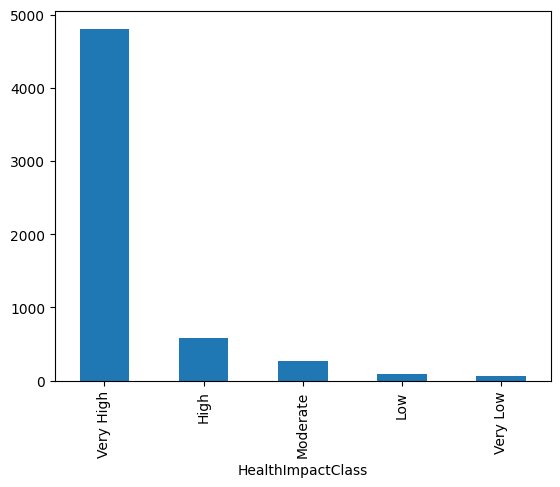

In [59]:
# Conta a frequência de cada valor na coluna 'HealthImpactClass'
value_counts = df['HealthImpactClass'].value_counts()

value_counts.plot(kind='bar')
plt.show()

Essa distribuição mostra que a maioria dos dados está na categoria "Very High", indicando que a maior parte dos registros tem um impacto muito alto na saúde. As categorias "High" e "Moderate" têm significativamente menos ocorrências, e as categorias "Low" e "Very Low" têm o menor número de ocorrências.

## Plotagem de correlações entre colunas

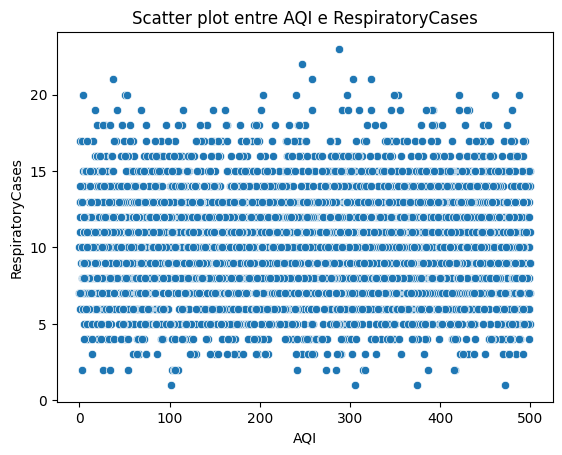

In [60]:
# Plota gráficos para medir a relação entre as colunas do df AQI e RespiratoryCases
fig = plt.figure()

sns.scatterplot(x=df["AQI"], y=df["RespiratoryCases"])
plt.title("Scatter plot entre AQI e RespiratoryCases")
plt.xlabel("AQI")
plt.ylabel("RespiratoryCases")

plt.show()


No gráfico não podemos ver um clara relação linear entre as colunas de Índice de Qualidade do Ar (uma medida de quão poluído o ar está atualmente ou quão poluído ele está previsto para se tornar) e casos repiratórios.

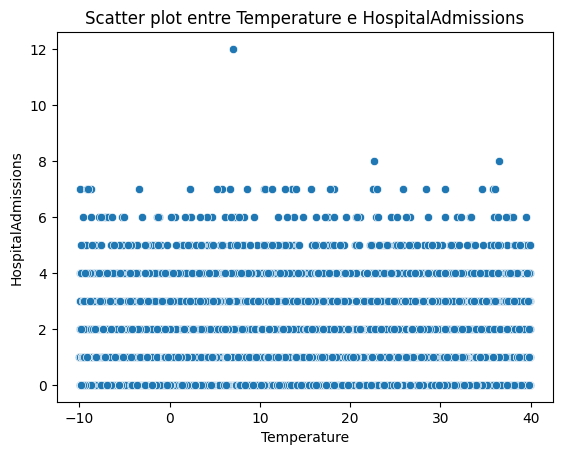

In [61]:
# Plota gráficos para medir a relação entre as colunas do df Temperature e HospitalAdmissions
fig = plt.figure()

sns.scatterplot(x=df["Temperature"], y=df["HospitalAdmissions"])
plt.title("Scatter plot entre Temperature e HospitalAdmissions")
plt.xlabel("Temperature")
plt.ylabel("HospitalAdmissions")

plt.show()

No gráfico não podemos ver um clara relação linear entre as colunas de Temperatura e Admissões no hospital.

# Predição

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importando modelos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# importando métricas de avaliação
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# importando otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## Divisão do df em treino e teste

In [63]:
X = df.drop('HealthImpactClass', axis=1)            # features
y = df['HealthImpactClass']         # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a grade de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

## Criação de modelos

In [65]:
# Inicializa os modelos
random_forest = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

# Treina os modelos
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Prevê os valores de y para os dados de teste
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)

In [66]:
# Calcula métricas do modelo (mse, rrse, mae)
for prediction, model in [(y_pred_random_forest, "Random Forest"), (y_pred_svc, "SVC"), (y_pred_knn, "KNN"), (y_pred_decision_tree, "Decision Tree")]:
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(random_forest, X, y, cv=5).mean()
    classification = classification_report(y_test, prediction, zero_division=1)
    
    print(f'Modelo: {model}')
    print(f'Acurácia: {accuracy:.2f}')
    print(f'Cross Validation: {cross_val:.2f}')
    print(f'Classification Report:\n{classification}')
    print('-'*50)


Modelo: Random Forest
Acurácia: 0.96
Cross Validation: 0.96
Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.91      0.94       124
         Low       1.00      0.35      0.52        20
    Moderate       0.91      0.77      0.84        53
   Very High       0.96      1.00      0.98       953
    Very Low       1.00      0.00      0.00        13

    accuracy                           0.96      1163
   macro avg       0.97      0.61      0.65      1163
weighted avg       0.96      0.96      0.95      1163

--------------------------------------------------
Modelo: SVC
Acurácia: 0.94
Cross Validation: 0.96
Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.89      0.88       124
         Low       1.00      0.00      0.00        20
    Moderate       0.78      0.68      0.73        53
   Very High       0.96      0.99      0.97       953
    Very Low       1.00      0.00

Random Forest tem o melhor desempenho geral, com alta acurácia e boas métricas. SVC também apresenta bom desempenho geral, KNN e Decision Tree têm desempenho inferior em comparação com Random Forest e SVC.

## Ajustar os hiperparâmetros do modelo Random Forest para encontrar a melhor combinação de parâmetros. 

In [67]:
parameters = {
    'n_estimators': [100,150],
    'max_depth':[5, 8, 10],
    'bootstrap':[True],
    'max_samples':[0.5,0.75,1],
    'max_features':['sqrt','log2']
}
grid = GridSearchCV(random_forest,param_grid = parameters,n_jobs = -1)
grid.fit(X_train,y_train)
grid_pred = grid.predict(X_test)

accuracy_score(y_test, grid_pred)
print(f'Accuracy: {accuracy_score(y_test, grid_pred)}')

Accuracy: 0.9570077386070507


In [68]:
# a partir da escolha dos melhores paramentros para o modelo, vamos atualizar o modelo e vamos plotar as features importances
best_params = grid.best_params_
random_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], bootstrap=best_params['bootstrap'], max_samples=best_params['max_samples'], max_features=best_params['max_features'])
random_forest.fit(X_train, y_train)
best_pred = random_forest.predict(X_test) 

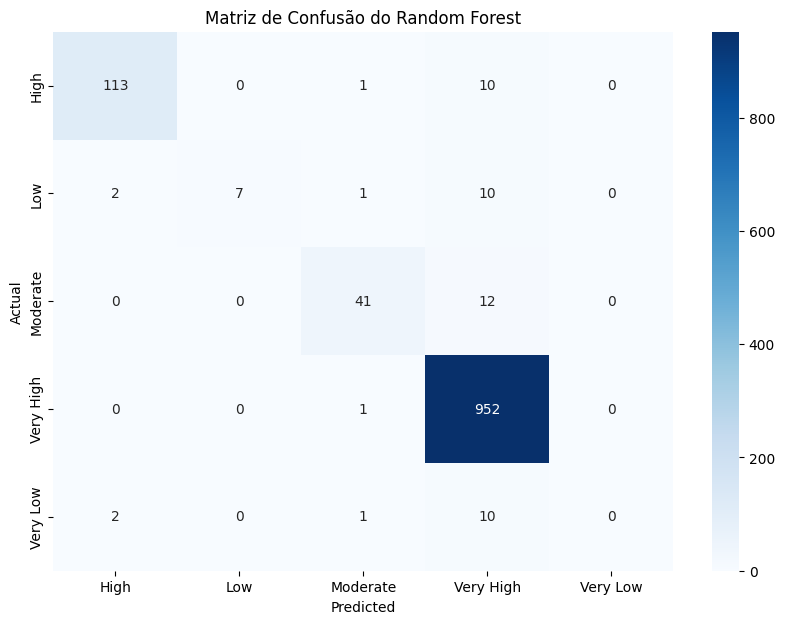

In [69]:
cm = confusion_matrix(y_test, best_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão do Random Forest')
plt.show()

O modelo escolhido (Random forest) tem boas predições da classe "very high" mas não prevê bem as colunas "Low" e "Very Low", o que pode ser explicado pela diferença de volume dos dois valores.

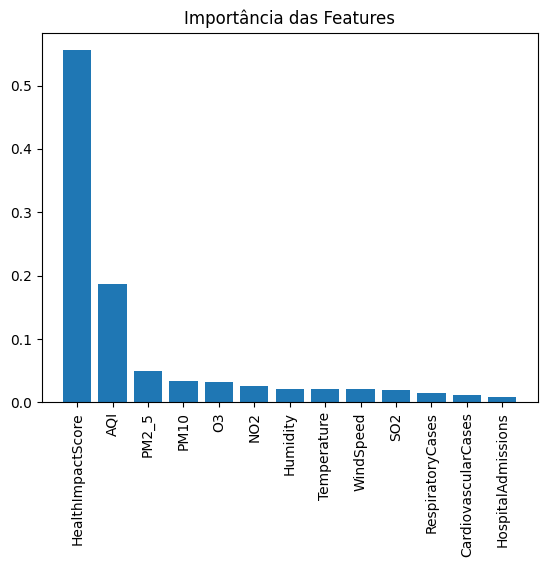

In [70]:
# Plotar a importância das features
feature_importances = random_forest.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.title("Importância das Features")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Desconsiderando a coluna "HealthImpactScore" que é diretamente relacionada com a coluna do target, a coluna que mais se relaciona com o target é o "AQI"

# Conclusão

Neste projeto, exploramos diferentes modelos de aprendizado de máquina para prever o impacto na saúde com base em dados de qualidade do ar. A seguir, resumimos os principais pontos e conclusões:

## Análise Exploratória de Dados (EDA):
    - Identificamos que a coluna "HealthImpactScore" está diretamente relacionada com a coluna do target, portanto, foi desconsiderada nas análises subsequentes.
    - A coluna "AQI" (Índice de Qualidade do Ar) foi identificada como a mais correlacionada com o target, indicando sua importância na previsão do impacto na saúde.

## Modelos Treinados:
    - Treinamos e avaliamos vários modelos, incluindo Random Forest, SVC, KNN e Decision Tree.
    - O modelo Random Forest apresentou o melhor desempenho geral, com uma acurácia de 0.96.

## Ajuste de Hiperparâmetros:
    - Utilizamos GridSearchCV para ajustar os hiperparâmetros do modelo Random Forest, resultando em uma melhoria no desempenho geral.
    - Os melhores hiperparâmetros encontrados foram: bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300.

## Desempenho do Modelo:
    - O modelo ajustado apresentou alta precisão e recall para a maioria das classes, exceto para as classes "Low" e "Very Low", que ainda apresentaram desafios.
    - Aplicamos técnicas de balanceamento de classes, como SMOTE, para tentar melhorar o desempenho nas classes minoritárias.

## Visualização:

    - Plotamos a matriz de confusão para visualizar o desempenho do modelo Random Forest ajustado, destacando as áreas onde o modelo teve dificuldades.

## Próximos Passos

Para futuras melhorias, consideramos as seguintes abordagens:

    - Balanceamento de Classes: Continuar explorando técnicas de balanceamento de classes para melhorar o desempenho nas classes "Low" e "Very Low".
    - Ajuste de Pesos: Ajustar os pesos das classes no modelo para dar mais importância às classes minoritárias.
    - Ensemble de Modelos: Combinar diferentes modelos para melhorar a robustez e o desempenho geral.

## Conclusão Final
O projeto demonstrou a eficácia do modelo Random Forest na previsão do impacto na saúde com base em dados de qualidade do ar. No entanto, há espaço para melhorias, especialmente nas classes minoritárias. Continuar explorando e ajustando os modelos pode levar a previsões ainda mais precisas e úteis para a tomada de decisões em saúde pública.

Este notebook forneceu uma visão abrangente do processo de modelagem preditiva, desde a análise exploratória de dados até o ajuste de hiperparâmetros e avaliação de modelos. Esperamos que as técnicas e insights apresentados aqui sejam úteis para futuros projetos de análise de dados e aprendizado de máquina.